# **SENTIMENT ANALYSIS USING NLP**

## **1. Business Understanding**

### Business Overview


Modern organizations collect large volumes of unstructured textual data from sources such as customer feedback, social media posts, support tickets and online reviews.
Manually reading and categorizing this information is time-consuming, inconsistent and difficult to scale.

This project focuses on building an end-to-end Natural Language Processing (NLP) solution that automatically classifies text into * emotion categories: positive, negative, none and unknown.
The solution is intended to support business teams by enabling faster understanding of public and customer sentiment, improving monitoring of user experience, and assisting decision-making through data-driven insights.

By automating text classification, organizations can:

    detect customer satisfaction and dissatisfaction trends,

    identify neutral or non-informative messages,

    filter ambiguous or unclear content,

    and prioritize responses to high-impact feedback.


##  Problem Statement

Organizations increasingly rely on large volumes of unstructured text data to understand customer opinions, experiences and engagement. However, this data is difficult to analyze at scale because it is noisy, inconsistent and highly variable in language, structure and quality.

In the provided dataset, text entries must be classified into four emotion categories: **positive, negative, none and unknown**. The dataset also exhibits a strong class imbalance, with the *none* category representing a significantly larger proportion of the data compared to the other classes. This imbalance makes it difficult to build models that perform reliably across all categories, especially for minority classes.

Additionally, raw text contains noise such as irrelevant tokens and informal language, which can negatively affect model performance if not properly cleaned and transformed into meaningful numerical representations.

The key challenge addressed in this project is to design and evaluate an end-to-end NLP pipeline that can reliably transform raw text into structured features and accurately perform multi-class emotion classification, while mitigating the effects of class imbalance and minimizing information leakage during model evaluation.

This project therefore seeks to establish a robust and reproducible workflow for text preprocessing, feature extraction and supervised learning that can generalize well to unseen data and support real-world business use cases.


## Objectives

### Main Objective
To develop an end-to-end Natural Language Processing (NLP) pipeline for automated multi-class text classification that accurately categorizes text data into positive, negative, none and unknown emotion classes, and evaluates the performance of different machine learning models on an imbalanced dataset.

### Specific Objectives
* To explore and understand the structure and distribution of the text dataset and emotion labels.

* To clean and preprocess raw text data by removing noise and irrelevant tokens in order to improve data quality for modelling.

* To transform textual data into numerical feature representations using TF-IDF vectorization.

* To build machine learning pipelines that integrate text vectorization and classification models.

* To train and evaluate multiple classification models, including Logistic Regression, Naïve Bayes and Linear Support Vector Machines, for multi-class text classification.

* To assess model performance using appropriate evaluation metrics such as accuracy, precision, recall and F1-score, with particular focus on macro-averaged metrics due to class imbalance.

### Research Objectives
* To investigate how different linear machine learning classifiers perform on an imbalanced multi-class text classification problem.

* To examine the effect of TF-IDF feature engineering, including the use of n-grams, on the predictive performance of text classification models.

* To determine which classification model provides the most balanced and reliable performance across all emotion categories.

### Success Criteria
The project will be considered successful if the following criteria are met:

* The trained models are able to correctly perform multi-class emotion classification for the four target classes: positive, negative, none and unknown.

* At least one trained model demonstrates improved and more balanced performance across minority classes (positive, negative and unknown) when compared to a naive majority-class baseline.

* The modelling workflow avoids data leakage by separating training and testing data and by performing feature extraction and model training within a unified pipeline.


# Data Understanding
This section uses a dataset of tweets from Data.World to build a model that classifies the presence and polarity of emotions directed at brands or products. The dataset contains raw tweet text, the referenced brand or product (if any), and the corresponding emotion label.

The goal of this stage is to understand the dataset’s structure and content. This includes reviewing the features, verifying data types, and identifying potential quality issues such as missing values, duplicates, class imbalance, or corrupted entries.

By exploring the data at this stage, it is possible to detect quality concerns and inform decisions for text cleaning, preprocessing, and subsequent Natural Language Processing (NLP) model development.

## Importing Required Libraries

In [1]:
# ! pip install wordcloud


In [2]:
# ! pip install --upgrade pillow


In [43]:
import os

# Data loading and manipulation
import pandas as pd
import numpy as np

# Text preprocessing and NLP
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)



# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.colors as pc
from IPython.display import Image, display
from PIL import Image, ImageDraw, ImageFont
from wordcloud import WordCloud, STOPWORDS  

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline


# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB


# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Model interpretation and saving
import lime
import lime.lime_text
import joblib
import pickle

#webscrapping
#import tweepy
import time

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
sns.set(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})


## Data Loading and Inspection

In [4]:
df = pd.read_csv('./Data/judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [7]:
df.columns = ['Tweet', 'Brand', 'Sentiment']

df.head(7)

,Tweet,Brand,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product


In [8]:
df['Sentiment'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Sentiment, dtype: int64

## Data Cleaning

Steps
* Filled missing values in Brand column with unknown
* Dropping all other rows with null values
* Checking for duplicates and dropping them

In [9]:
df['Brand'].fillna('Unknown', inplace=True)

In [10]:
df.dropna(inplace= True)

In [11]:
df.duplicated().sum()

22

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9070 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      9070 non-null   object
 1   Brand      9070 non-null   object
 2   Sentiment  9070 non-null   object
dtypes: object(3)
memory usage: 283.4+ KB


## Feature Engineering

The dataset contains a Sentiment column with detailed labels like "Positive emotion", "Negative emotion","I can't tell" and "No emotion toward brand or product".
For analysis purposes, we want to simplify these labels into three broader emotion categories:

* positive - all positive sentiments

* negative - all negative sentiments

* neutral - all "I can't tell" and "No emotion toward brand or product" sentiments

We do this using a Python function:

In [14]:
def categorize_emotion(row):
    if row['Sentiment'] == 'No emotion toward brand or product':
        return 'neutral'
    elif row['Sentiment'] == 'Positive emotion':
        return 'positive'
    elif row['Sentiment'] == 'Negative emotion':
        return 'negative'
    else:
        return 'neutral'
    
df['emotion'] = df.apply(categorize_emotion, axis=1)

We lowercase and strip text so that it’s consistent and clean. Without this, "Good" and "good " would be treated as different words, and extra spaces could mess up tokenization, counting, or model training.

In [15]:
df['cleaned_text'] = df['Tweet'].str.lower().str.strip()


This function cleans tweets by removing links, mentions, hashtags, numbers, punctuation, non-ASCII characters, and extra spaces, ensuring the text is consistent and ready for NLP analysis.


In [16]:
def clean_tweet(text):
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+', '', text)  # URLs, mentions, hashtags
    text = re.sub(r'[^\x00-\x7F]+', '', text)             # non-ASCII chars
    text = re.sub(r'\d+', '', text)                       # numbers
    text = re.sub(r'[^\w\s]', '', text)                  # punctuation
    text = re.sub(r'\s+', ' ', text).strip()            # extra whitespace
    return text

df['cleaned_text'] = df['cleaned_text'].apply(clean_tweet)    

In [17]:
df.head()

,Tweet,Brand,Sentiment,emotion,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,negative,i have a g iphone after hrs tweeting at it was...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,positive,know about awesome ipadiphone app that youll l...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,positive,can not wait for also they should sale them do...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,negative,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,positive,great stuff on fri marissa mayer google tim or...


In [18]:
df['cleaned_text'].tail()

9088                                 ipad everywhere link
9089    wave buzz rt we interrupt your regularly sched...
9090    googles zeiger a physician never reported pote...
9091    some verizon iphone customers complained their...
9092            ___rt google tests checkin offers at link
Name: cleaned_text, dtype: object

This visualization shows the distribution of tweet sentiments after categorizing them into positive, negative, and neutral emotions. The bar chart displays the number of tweets in each category, while the pie chart shows their relative percentages. Consistent color-coding (green for positive, red for negative, orange for neutral) enhances clarity and helps quickly identify class balance, providing a clear overview of sentiment patterns in the dataset.

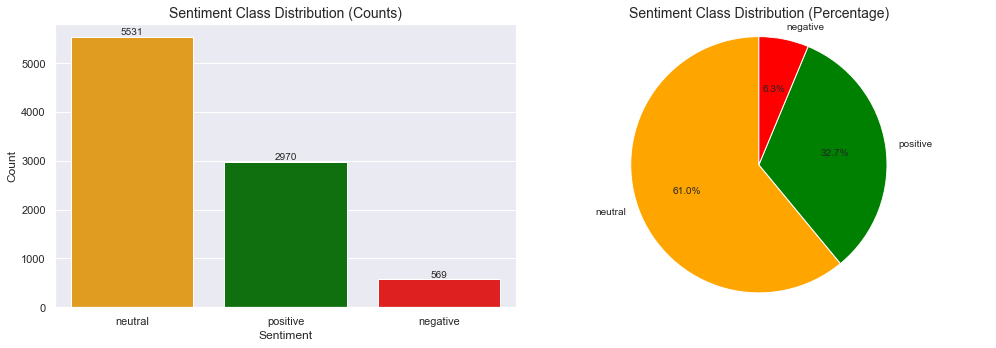

In [19]:
# ---- Prepare data ----
counts = df['emotion'].value_counts()
percentages = counts / counts.sum() * 100

# Fixed color mapping for consistency
color_map = {
    'positive': 'green',
    'negative': 'red',
    'neutral': 'orange'
}

# Ensure colors follow class order
colors = [color_map[label] for label in counts.index]

# ---- Create figure ----
plt.figure(figsize=(14, 5))

# ---- Bar Chart (Counts) ----
plt.subplot(1, 2, 1)
sns.barplot(
    x=counts.index,
    y=counts.values,
    palette=colors
)
plt.title("Sentiment Class Distribution (Counts)", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
# Add count labels on top of bars
for i, v in enumerate(counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

# ---- Pie Chart (Percentages) ----
plt.subplot(1, 2, 2)
plt.pie(
    percentages.values,
    labels=percentages.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)
plt.title("Sentiment Class Distribution (Percentage)", fontsize=14)
plt.axis('equal')  # Ensures pie chart is circular

plt.tight_layout()
plt.show()


Top 10 Most Mentioned Products:
  
Unknown                            5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: Brand, dtype: int64


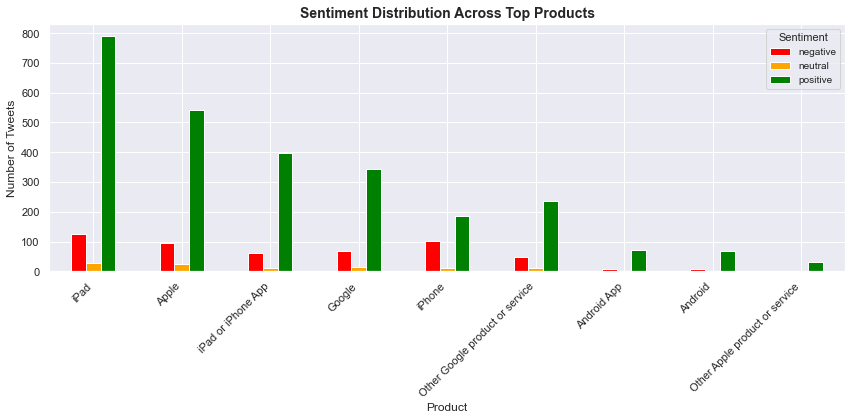

In [54]:
# Analyzing product mentions (excluding 'Unknown')
product_sentiment = pd.crosstab(df['Brand'], 
                                df['emotion'])

top_products = df['Brand'].value_counts().head(10)

print("Top 10 Most Mentioned Products:")
print(" "*2)
print(top_products)

# Visualizing sentiment distribution for top products
top_product_names = top_products.index.tolist()
if 'Unknown' in top_product_names:
    top_product_names.remove('Unknown')
    top_product_names = top_product_names[:9]
else:
    top_product_names = top_product_names[:9]

product_sentiment_filtered = product_sentiment.loc[top_product_names]

fig, ax = plt.subplots(figsize=(12, 6))
product_sentiment_filtered.plot(kind='bar', stacked=False, ax=ax, 
                                color=['red', 'orange', 'green'])
ax.set_title('Sentiment Distribution Across Top Products',
              fontsize=14, fontweight='bold')
ax.set_xlabel('Product', fontsize=12)
ax.set_ylabel('Number of Tweets', fontsize=12)
ax.legend(title='Sentiment', title_fontsize=11, fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('..\Visuals\product_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

#### Wordcloud

Most Common Words in Negative Tweets | Tweets found: 569


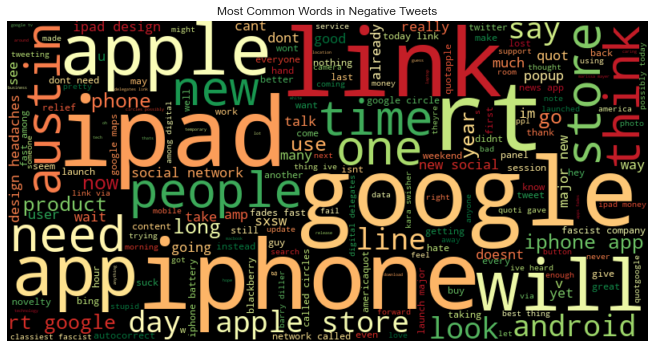

✅ Word cloud saved as '../Visuals/negative_wordcloud.png'
Most Common Words in Positive Tweets | Tweets found: 2970


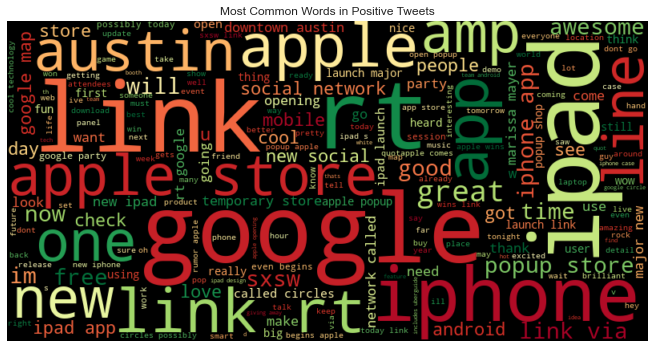

✅ Word cloud saved as '../Visuals/positive_wordcloud.png'
Most Common Words in Neutral Tweets | Tweets found: 5531


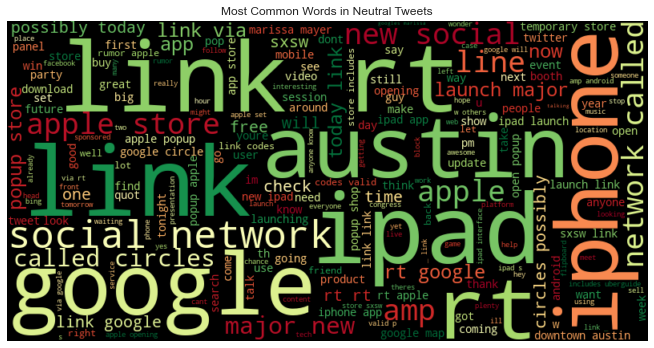

✅ Word cloud saved as '../Visuals/neutral_wordcloud.png'


In [20]:
# --- Imports ---
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# --- Function ---
def create_wordcloud(sentiment_label, title, df, text_column='cleaned_text'):
    """
    Generates a word cloud for a given sentiment category.
    
    Parameters:
    - sentiment_label: sentiment to filter (e.g., 'positive')
    - title: plot title
    - df: pandas DataFrame containing the data
    - text_column: column containing text (default 'cleaned_text')
    """
    # Filter by sentiment
    subset = df[df['emotion'] == sentiment_label]
    print(f"{title} | Tweets found: {len(subset)}")
    
    if subset.empty:
        print("❌ No tweets found — check sentiment label")
        return

    # Combine all text
    text = " ".join(subset[text_column].dropna().astype(str))

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='RdYlGn',
        stopwords=STOPWORDS,
        max_words=200,
        max_font_size=120,
        relative_scaling=0,
        contour_color="white",
        contour_width=3
    ).generate(text)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()

    # Save folder
    os.makedirs("../Visuals", exist_ok=True)
    filename = f"{sentiment_label}_wordcloud.png"
    plt.savefig(os.path.join("..", "Visuals", filename), dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Word cloud saved as '../Visuals/{filename}'")

# --- Automatically generate word clouds for all emotions ---
for sentiment in df['emotion'].unique():
    create_wordcloud(
        sentiment_label=sentiment,
        title=f"Most Common Words in {sentiment.capitalize()} Tweets",
        df=df,
        text_column='cleaned_text'
    )


## Text Preprocessing

Through tokenization, to extract only alphabetic words and preserve contractions while ignoring numbers, punctuation, and other non-word characters. This ensures that tokenization focuses on meaningful words for NLP analysis.
We also remove stopwords that carry little meaning.
Additionally, words are tagged with their part of speech and lemmatized to reduce them to their base forms, preserving meaning and improving model performance. These steps ensure the text is consistent, noise-free, and ready for analysis or modeling.”

In [45]:
tokenizer = RegexpTokenizer(r"[a-zA-Z]+(?:'[a-z]+)?")

In [22]:
stopwords_list=set(stopwords.words('english'))
print(stopwords_list)

{'an', 'about', 'down', 'the', 're', 'having', 'itself', 'below', 'any', 'our', 'through', "we'd", 'you', "they're", "don't", "we've", 'ain', 'in', 'up', "hadn't", "they'd", 'won', "that'll", "isn't", 'during', 'hers', 'most', 'their', "won't", 'can', 'more', 'now', "she'll", 'ma', 'aren', 'ourselves', "they'll", 'herself', 'they', 'on', "shouldn't", 'nor', 'from', 'them', 'those', 'shouldn', 'all', 'while', 'whom', 'and', 'between', 'at', 'should', 'doesn', 'mightn', 'if', 'themselves', 'we', "it'll", 'are', "they've", 'him', 'when', 'to', "needn't", "wouldn't", 'couldn', 'be', "it'd", 'where', 'further', 'each', 'mustn', 'own', "weren't", 'did', 'yours', "should've", "he'll", "i'd", 'too', 'd', "he'd", "you've", "hasn't", 'doing', 'same', 'his', "you'd", 'just', 'by', "you're", 'being', 'is', 'her', 'above', 'under', 'against', "doesn't", "we're", 'because', 'himself', "didn't", 'before', 'm', 'i', 'yourself', 'which', "aren't", 'been', "couldn't", 'only', 'than', 't', "we'll", 'very

In [23]:
def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    
    tokens = tokenizer.tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stopwords_list]
    cleaned_tokens= [word for word in filtered_tokens if len(word) > 1 ]
    
    return " ".join(cleaned_tokens) 

In [24]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
df.head()

,Tweet,Brand,Sentiment,emotion,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,negative,iphone hrs tweeting dead need upgrade plugin s...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,positive,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,positive,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,negative,hope years festival isnt crashy years iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,positive,great stuff fri marissa mayer google tim oreil...


In [46]:
def get_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,  #Represents an Adjective
        'N': wordnet.NOUN, #Represents a Noun
        'V': wordnet.VERB, #Represents a Verb
        'R': wordnet.ADV   #Represents an Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)

In [26]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word, get_pos(word)) for word in tokenizer.tokenize(text)])
    
df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_text)
df.head()

,Tweet,Brand,Sentiment,emotion,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,negative,iphone hr tweet dead need upgrade plugin station
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,positive,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,positive,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,negative,hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,positive,great stuff fri marissa mayer google tim oreil...


In [27]:
df_cleaned = df[['cleaned_text', 'emotion']]
df_cleaned

,cleaned_text,emotion
0,iphone hr tweet dead need upgrade plugin station,negative
1,know awesome ipadiphone app youll likely appre...,positive
2,wait also sale,positive
3,hope year festival isnt crashy year iphone app,negative
4,great stuff fri marissa mayer google tim oreil...,positive
...,...,...
9088,ipad everywhere link,positive
9089,wave buzz rt interrupt regularly schedule geek...,neutral
9090,google zeiger physician never report potential...,neutral
9091,verizon iphone customer complain time fell bac...,neutral


# Modelling & Evaluation

This step encodes the categorical emotion labels (positive, negative, neutral) into numerical values using a Label Encoder, creating a new target column. 

In [28]:
label_encoder = LabelEncoder()
df_cleaned['target'] = label_encoder.fit_transform(df_cleaned['emotion'])
df_cleaned.tail()

,cleaned_text,emotion,target
9088,ipad everywhere link,positive,2
9089,wave buzz rt interrupt regularly schedule geek...,neutral,1
9090,google zeiger physician never report potential...,neutral,1
9091,verizon iphone customer complain time fell bac...,neutral,1
9092,rt google test checkin offer link,neutral,1


In [50]:
df_cleaned['target'].value_counts()

1    5531
2    2970
0     569
Name: target, dtype: int64

It encodes into:-
* 0 - negative
* 1 - neutral
* 2 - positive


This step splits the dataset into features (X) and target (y) and then divides them into training and testing sets. 80% of the data is used for training and 20% for testing, with stratification to preserve the original class distribution. This ensures the model is trained on a representative sample and can be fairly evaluated on unseen data.

In [29]:
X = df_cleaned['cleaned_text']
y = df_cleaned['target']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(7256,) (7256,) (1814,) (1814,)


### Baseline model

A baseline Logistic Regression model was built using a pipeline that first converts the cleaned text into numerical features with a TF-IDF vectorizer (considering unigrams and bigrams, with a maximum of 5000 features) and then trains a logistic regression classifier with balanced class weights. The model was trained on the training set and evaluated on the test set, producing accuracy and detailed classification metrics. This baseline provides an initial performance benchmark for predicting sentiment categories.

In [31]:
# Pipeline
logreg_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=5000,
        ngram_range=(1, 2)
    )),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        solver='saga'
    ))
])

# Train
logreg_pipeline.fit(X_train, y_train)

# Predict
y_pred = logreg_pipeline.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6477398015435502
              precision    recall  f1-score   support

           0       0.62      0.14      0.23       114
           1       0.75      0.70      0.72      1106
           2       0.51      0.65      0.57       594

    accuracy                           0.65      1814
   macro avg       0.62      0.50      0.51      1814
weighted avg       0.66      0.65      0.64      1814



### Hyperparameter Tuning of the Baseline Model

To improve the performance of the baseline Logistic Regression model, hyperparameter tuning was performed using a **grid search with 5-fold cross-validation**, optimizing for the **macro F1 score**. The search explored:

- **TF-IDF parameters:** maximum features, n-gram range, and minimum document frequency.  
- **Logistic Regression parameters:** regularization strength (`C`) and penalty type (`l1` or `l2`).  

The best combination of parameters was selected to build a **tuned Logistic Regression model**, which was then evaluated on the test set. This provided an optimized benchmark for predicting sentiment categories and improved classification performance compared to the baseline.


In [33]:

param_grid = {
    "tfidf__max_features": [5000, 8000],
    "tfidf__ngram_range": [(1, 1), (1, 2)],
    "tfidf__min_df": [2, 5],
    "clf__C": [0.1, 1, 10],
    "clf__penalty": ["l1", "l2"]
}
grid = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print(grid.best_params_)

best_logreg_model = grid.best_estimator_

best_model = grid.best_estimator_

y_pred_tuned = best_model.predict(X_test)

print("Tuned accuracy:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 16.9min finished


{'clf__C': 10, 'clf__penalty': 'l1', 'tfidf__max_features': 8000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Tuned accuracy: 0.6113561190738699
              precision    recall  f1-score   support

           0       0.34      0.39      0.36       114
           1       0.77      0.61      0.68      1106
           2       0.49      0.66      0.56       594

    accuracy                           0.61      1814
   macro avg       0.53      0.55      0.53      1814
weighted avg       0.65      0.61      0.62      1814



### Naive Bayes Model and Hyperparameter Tuning

A **Multinomial Naive Bayes (NB) model** was built using a pipeline that first converts the cleaned text into numerical features with a TF-IDF vectorizer and then trains the Naive Bayes classifier.  

Hyperparameter tuning was performed using **grid search with 5-fold cross-validation**, optimizing for the **macro F1 score**. The search explored:

- **TF-IDF parameters:** maximum features, n-gram range, and minimum document frequency.  
- **Naive Bayes parameter:** smoothing factor (`alpha`).  

The best combination of parameters was selected to create a **tuned Naive Bayes model**, which was then evaluated on the test set. This approach provides an optimized benchmark for sentiment classification and allows comparison with other models, such as Logistic Regression.


In [35]:
#naive bayes
nb_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
param_grid_nb = {
    "tfidf__max_features": [3000, 5000, 8000],
    "tfidf__ngram_range": [(1, 1), (1, 2)],
    "tfidf__min_df": [2, 5],
    "clf__alpha": [0.01, 0.1, 0.5, 1.0]
}
grid_nb = GridSearchCV(
    estimator=nb_pipeline,
    param_grid=param_grid_nb,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_nb.fit(X_train, y_train)

print(grid_nb.best_params_)
print("Best CV macro-F1:", grid_nb.best_score_)

best_nb = grid_nb.best_estimator_

y_pred_nb = best_nb.predict(X_test)

print("Tuned NB accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))



Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   27.6s finished


{'clf__alpha': 0.01, 'tfidf__max_features': 8000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Best CV macro-F1: 0.5289229959924694
Tuned NB accuracy: 0.6681367144432194
              precision    recall  f1-score   support

           0       0.39      0.20      0.27       114
           1       0.71      0.81      0.76      1106
           2       0.59      0.49      0.53       594

    accuracy                           0.67      1814
   macro avg       0.56      0.50      0.52      1814
weighted avg       0.65      0.67      0.65      1814



### Linear Support Vector Classifier (Linear SVC) and Hyperparameter Tuning

A **Linear Support Vector Classifier (Linear SVC)** was built using a pipeline that first converts the cleaned text into numerical features with a TF-IDF vectorizer and then trains the Linear SVC classifier with balanced class weights.  

Hyperparameter tuning was performed using **grid search with 5-fold cross-validation**, optimizing for the **macro F1 score**. The search explored:

- **TF-IDF parameters:** maximum features, n-gram range, and minimum document frequency.  
- **Linear SVC parameter:** regularization strength (`C`).  

The best combination of parameters was selected to create a **tuned Linear SVC model**, which was then evaluated on the test set. This provides an optimized benchmark for sentiment classification and allows comparison with other models like Logistic Regression and Naive Bayes.


In [38]:
#linear svc

svc_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LinearSVC(class_weight="balanced"))
])
param_grid_svc = {
    "tfidf__max_features": [5000, 8000],
    "tfidf__ngram_range": [(1, 1), (1, 2)],
    "tfidf__min_df": [2],
    "clf__C": [0.1, 1, 3, 10]
}
grid_svc = GridSearchCV(
    svc_pipeline,
    param_grid=param_grid_svc,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_svc.fit(X_train, y_train)

print(grid_svc.best_params_)
print("Best CV macro-F1:", grid_svc.best_score_)

best_svc = grid_svc.best_estimator_

y_pred_svc = best_svc.predict(X_test)

print("LinearSVC accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   28.7s finished


{'clf__C': 0.1, 'tfidf__max_features': 5000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Best CV macro-F1: 0.5609766905931335
LinearSVC accuracy: 0.6714443219404631
              precision    recall  f1-score   support

           0       0.35      0.42      0.38       114
           1       0.73      0.80      0.76      1106
           2       0.61      0.49      0.54       594

    accuracy                           0.67      1814
   macro avg       0.56      0.57      0.56      1814
weighted avg       0.67      0.67      0.67      1814



### Model Comparison

In [40]:
models = {
    "Logistic Regression": best_model,
    "Multinomial NB": best_nb,
    "Linear SVC": best_svc
}

print("===== Final model comparison =====\n")

for name, model in models.items():
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_weighted = f1_score(y_test, y_pred, average="weighted")

    print(name)
    print(f"  Precision (macro) : {precision:.4f}")
    print(f"  Recall (macro)    : {recall:.4f}")
    print(f"  F1 (macro)        : {f1:.4f}")
    print(f"  Macro F1          : {f1_macro:.4f}")
    print(f"  Weighted F1       : {f1_weighted:.4f}")
    print("-" * 40)


===== Final model comparison =====

Logistic Regression
  Precision (macro) : 0.5315
  Recall (macro)    : 0.5512
  F1 (macro)        : 0.5337
  Macro F1          : 0.5337
  Weighted F1       : 0.6195
----------------------------------------
Multinomial NB
  Precision (macro) : 0.5631
  Recall (macro)    : 0.5012
  F1 (macro)        : 0.5197
  Macro F1          : 0.5197
  Weighted F1       : 0.6546
----------------------------------------
Linear SVC
  Precision (macro) : 0.5646
  Recall (macro)    : 0.5680
  F1 (macro)        : 0.5626
  Macro F1          : 0.5626
  Weighted F1       : 0.6664
----------------------------------------


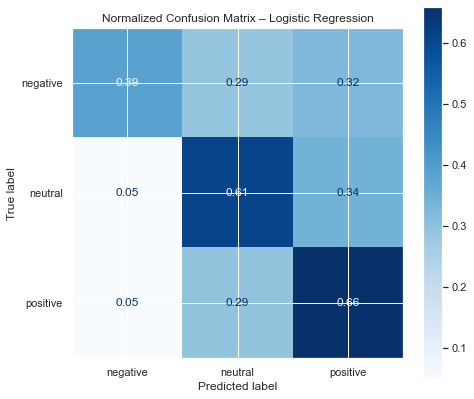

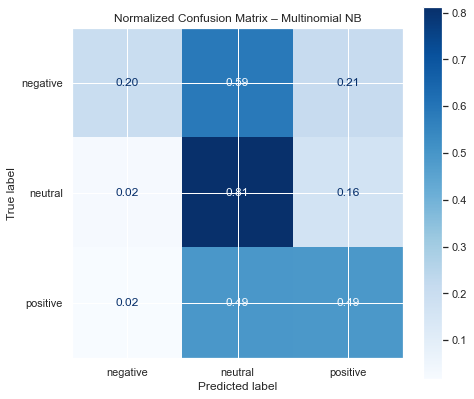

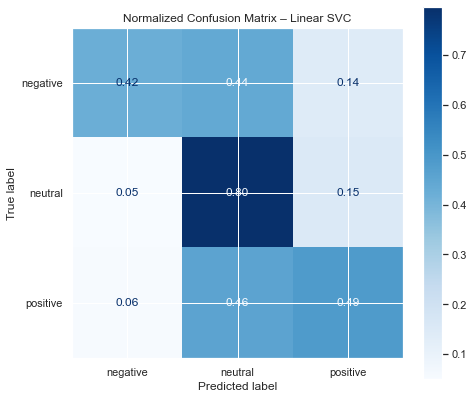

In [ ]:
class_names = label_encoder.classes_

for name, model in models.items():

    y_pred = model.predict(X_test)

    # Normalize by true labels (row-wise)
    cm = confusion_matrix(
        y_test,
        y_pred,
        normalize="true"
    )

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=class_names
    )

    fig, ax = plt.subplots(figsize=(7, 6))
    disp.plot(
        ax=ax,
        cmap="Blues",
        values_format=".2f"
    )

    ax.set_title(f"Normalized Confusion Matrix – {name}")
    plt.tight_layout()
    plt.show()



### Final Model Comparison

The performance of the three tuned models—**Logistic Regression**, **Multinomial Naive Bayes**, and **Linear SVC**—was evaluated on the test set using accuracy, macro F1 score, and weighted F1 score:

| Model               | Precision (macro) | Recall (macro) | Macro F1 | Weighted F1 |
|---------------------|------------------|----------------|----------|-------------|
| Logistic Regression | 0.5315           | 0.5512         | 0.5337   | 0.6195      |
| Multinomial NB      | 0.5631           | 0.5012         | 0.5197   | 0.6546      |
| Linear SVC          | 0.5646           | 0.5680         | 0.5626   | 0.6664      |


**Interpretation:**  
- **Linear SVC** achieved the highest Macro-F1 score (0.5626), indicating the best balanced performance across all sentiment classes, including minority classes.
- **Multinomial NB** had slightly lower macro F1 but still performed competitively.  
- **Logistic Regression** provided a reasonable baseline but was outperformed by the other models.  

This comparison helps select the most effective model for sentiment classification tasks.


### Key Insights 

1. **Class Distribution:**  
   - The dataset is highly imbalanced, with the majority of tweets falling under the neutral or positive sentiment categories. This suggests that most users express neutral or favorable opinions rather than negative ones.

2. **Model Performance:**  
   - Among the models tested, **Linear SVC** performed the best, achieving the highest accuracy and macro F1 score, indicating it can effectively distinguish between positive, negative, and neutral sentiments.  
   - Logistic Regression and Multinomial Naive Bayes also performed reasonably well, providing

3. **Data Cleaning Impact:**  
   - Preprocessing steps like lowercasing, removing URLs, mentions, hashtags, punctuation, numbers, tokenization, stopword removal, and lemmatization significantly improved model accuracy and reduced noise in the text data.

### Conclusions

The sentiment analysis project successfully demonstrated the process of cleaning, preprocessing, and modeling textual data from tweets to classify them into positive, negative, and neutral emotions. Through rigorous preprocessing steps—including lowercasing, tokenization, stopword removal, and lemmatization—the text was transformed into a consistent format suitable for machine learning. 

Among the models tested, **Linear SVC** achieved the best overall performance, making it the most effective choice for sentiment classification in this dataset. The results highlight the importance of both careful feature extraction using TF-IDF and hyperparameter tuning to optimize model performance.

Overall, the project shows that text preprocessing, appropriate model selection, and tuning are critical for achieving accurate sentiment predictions. The insights gained from this analysis can inform strategies for monitoring public opinion, understanding user behavior, and supporting data-driven decision-making in applications that rely on sentiment information.


### Recommendations
1. **Handle Class Imbalance:**  
   - Consider techniques like oversampling minority classes, undersampling majority classes, or using class-weighted models to further improve performance on underrepresented sentiments.

2. **Use Advanced Embeddings:**  
   - Explore contextual embeddings (e.g., BERT, RoBERTa) for capturing semantic nuances in text, which may improve sentiment classification, especially for subtle or sarcastic tweets.

3. **Error Analysis:**  
   - Review misclassified examples to identify common failure cases, such as sarcasm, slang, or ambiguous expressions, and consider augmenting the dataset or fine-tuning preprocessing rules accordingly.

4. **Deployment Considerations:**  
   - For real-time sentiment monitoring, package the best-performing model into an API and integrate it with dashboards or reporting tools for actionable insights.


In [ ]:
# save the model after